### **Q1. Exploratory Data Analysis (EDA)**

#### **OBJECTIVE**
This Jupyter Notebook will seek to conduct an EDA on the dataset from aiap technical assessment and present its findings of the analysis at the end. The task is to predict the **total number of active users (guest - users and registered - users)**  in order to help in demand forecasting

#### **GENERAL OVERVIEW OF EDA**
#####  **1) CHECKING IF THE DATA IS INTUITIVE**
Using domain knowledge, we will analyse the data and pick out areas that might require further analysis (e.g. incorrect data, identify outliers etc.)

#####  **2) UNIVARIATE ANALYSIS**
We will analyse each feature in detail and conduct feature cleaning/engineering (if needed).

#####  **3) EXPLORE HIDDEN RELATIONSHIPS BETWEEN FEATURES**
We will be checking for hidden relationships between features that might interfere with our model (e.g. multicollinearity, possible non-linear relationships). After which, we will perform feature selection (if needed).

#####  **4) SUMMARY OF ANALYSIS AND IMPLICATIONS**
We will then summarize our findings from part 1, 2 and 3 above and identify things which we can do based on our findings.

In [7]:
# Importing the libraries

# System
import io, os, sys, datetime, math, calendar
from datetime import timedelta, date

# Data Manipulation
import numpy as np
import pandas as pd

# Visualisation
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning Preprocessing Modules
from mlp.ml_module.eda_preprocessing import (plot_distribution, return_index, firstlast_datehour,
                                   daterange, full_datehour, return_missing_datehour,
                                   add_features_datetime_YMD, cyclical_features,
                                   plot_correlation)

#####  **1) CHECKING IF THE DATA IS INTUITIVE**

**Summary:** 
<br>This dataset provides hourly values for the number of active users for an e -scooter rental service in a city. The features include the date and various weather parameters. 
 
**Independent Features:** 
<br>`date`​: Date in YYYY-MM-DD
<br>`hr`​: Hour (0 to 23) 
<br>`weather`​: Description of the weather conditions for that hour 
<br>`temperature`​: Average temperature for that hour (Fahrenheit)
<br>`feels-like-temperature`​: Average feeling temperature for that hour (Fahrenheit)
<br>`relative-humidity`:​ Average relative humidity for that hour. Measure of the amount of water in the air (%)
<br>`windspeed`​: Average speed of wind for that hour
<br>`psi`:​ Pollutant standard index. Measure of pollutants present in the air. (0 to 400)
 
**Target Features:**
<br>`guest-users`​: Number of guest users using the rental e-scooters in that hour
<br>`registered-users`​: Number of registered users using the rental e-scooters in that hour

In [294]:
# Import the dataset
data_url = 'https://aisgaiap.blob.core.windows.net/aiap6-assessment-data/scooter_rental_data.csv'
dataset = pd.read_csv(data_url)

In [295]:
# Check the first 10 lines for the dataset for intuition
dataset.head(10)

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,95.0,81.0,0.0,3,21,164
1,2011-01-01,1,clear,65.0,93.2,80.0,0.0,35,54,417
2,2011-01-01,2,clear,65.0,93.2,80.0,0.0,38,35,356
3,2011-01-01,3,clear,66.7,95.0,75.0,0.0,35,19,129
4,2011-01-01,4,clear,66.7,95.0,75.0,0.0,11,-2,10
5,2011-01-01,5,cloudy,66.7,91.4,75.0,6.0,12,2,10
6,2011-01-01,6,clear,65.0,93.2,80.0,0.0,19,15,2
7,2011-01-01,7,clear,63.3,91.4,86.0,0.0,33,5,27
8,2011-01-01,8,clear,66.7,95.0,75.0,0.0,45,8,96
9,2011-01-01,9,clear,73.5,102.2,76.0,0.0,33,57,73


In [296]:
# Check the details of the dataset for intuition
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17958 entries, 0 to 17957
Data columns (total 10 columns):
date                      17958 non-null object
hr                        17958 non-null int64
weather                   17958 non-null object
temperature               17958 non-null float64
feels-like-temperature    17958 non-null float64
relative-humidity         17958 non-null float64
windspeed                 17958 non-null float64
psi                       17958 non-null int64
guest-users               17958 non-null int64
registered-users          17958 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.4+ MB


In [297]:
# Convert 'date' to datetime format='%Y-%m-%d'
dataset['date'] =  pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [298]:
# Check the details of the dataset for intuition
dataset.describe()

,hr,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
count,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000
mean,11.533578,88.457512,117.332008,62.758993,12.733155,24.557300,249.740394,1998.910346
std,6.915319,16.285017,20.416251,19.266532,8.213750,14.451091,344.815252,1966.561546
min,0.000000,48.100000,60.800000,0.000000,0.000000,0.000000,-2.000000,-5.000000
25%,6.000000,75.200000,100.400000,48.000000,7.000000,12.000000,27.000000,441.000000
50%,12.000000,88.700000,118.400000,63.000000,13.000000,24.000000,117.000000,1504.000000
75%,18.000000,102.200000,134.600000,78.000000,17.000000,37.000000,338.000000,2860.000000
max,23.000000,131.000000,179.600000,100.000000,57.000000,49.000000,2567.000000,11519.000000


From the snapshots of the dataset provided above, please refer to the table below for the summary of our observations. For each observation, we will analyze them in further detail when we conduct our univariate analysis.

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | feature engineering/cleaning (e.g. additional features - weekday vs weekend, cyclical features) for 'date' and 'hr' | univariate analysis |
| 2 | similar features 'temperature' and 'feels-like-temperature' <br> (one of which might be redundant, might remove to prevent overfitting) | univariate analysis |
| 3 | zero value for 'relative-humidity', 'windspeed' and 'psi' <br> (value should not be zero) | univariate analysis |
| 4 | negative values for 'guest-users' and 'registered-users' <br> (values should not be negative) | univariate analysis |
| 5 | there are no null values <br> (data might have been pre-processed, null data might have been replaced (e.g. replaced with mean, median, -1, -999 etc.)) | to check with data provider |

#####  **2) UNIVARIATE ANALYSIS**
For our dataset, we can categorise into 3 main categories for our analysis:
<br> **Numerical:** feature that contains numeric values
<br> **Categorical:** feature that contains categories or texts 
<br> **Time_Date:** feature that contains time/date

For this section we will:
<br> **a) conduct relevant analysis based on the category**
<br> **b) conduct feature cleaning and engineering based on findings from part 1 and part 2a (if required)**

**NUMERICAL FEATURES:** 
<br> 'temperature', 'feels-like-temperature', 'relative-humidity', 'windspeed', 'guest-users', 'registered-users'

**a) Analysis of numerical features - Boxplot**

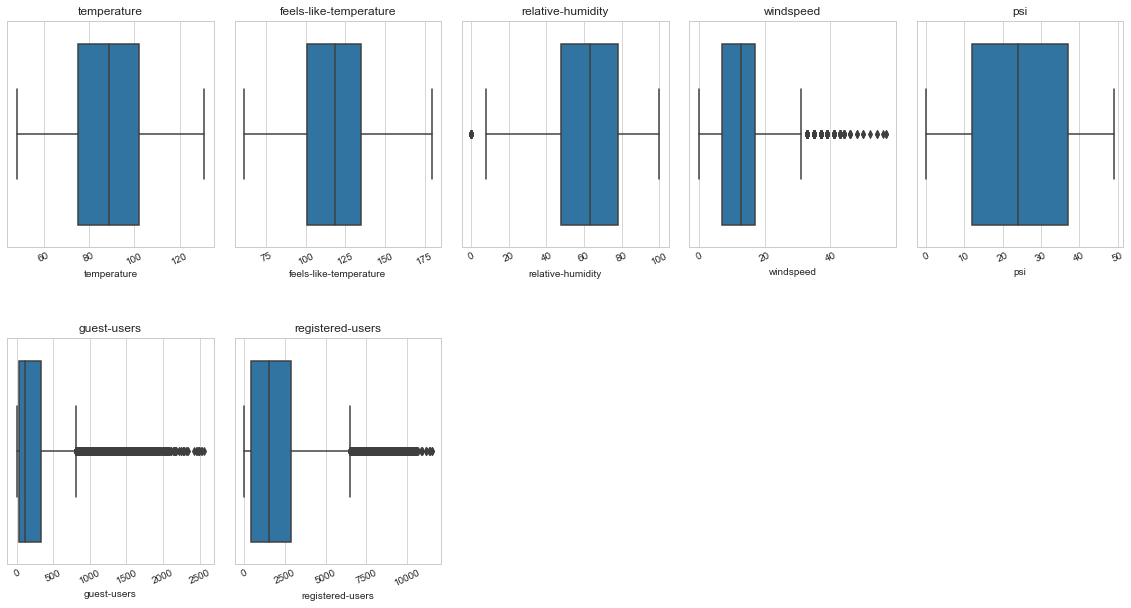

In [236]:
# Plot distribution of all numerical features for analysis
num_features = ['temperature', 'feels-like-temperature', 'relative-humidity', 'windspeed', 'psi', 'guest-users', 'registered-users']
plot_distribution(dataset, num_features, cols=5, rows=2, width=20 , height=10, hspace=0.4, wspace=0.1)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | The zero value(s) for 'relative-humidity', 'windspeed' and 'psi' which conincides with the findings above in part 1 <br> | to replace with appropriate value(s) (if applicable) |
| 2 | Datapoints roughly >30  for 'windspeed' are classified as outliers. However, from research online, windspeed <60 is reasonable. In addition, it might be classified as outliers due to zero value(s). | no further actions required |
| 3 | 'guest-users' and 'registered-users' contains values <0 which conincides with the findings above in part 1 | to replace with appropriate value(s) (if applicable)  |

**b) Feature cleaning and engineering for numerical features - Boxplot**

**Feature:** 'relative-humidity'

In [237]:
# Get index of data that has value zero for 'relative-humidity'
dataset_index_rh = return_index(dataset=dataset, column='relative-humidity', value=0, criteria='equal')

# Display data that has the value zero for 'relative-humidity'
dataset.loc[dataset.index.isin(dataset_index_rh)]

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
1551,2011-03-10,0,light snow/rain,75.2,98.6,0.0,17.0,40,20,4
1552,2011-03-10,1,light snow/rain,75.2,98.6,0.0,17.0,4,0,22
1553,2011-03-10,2,light snow/rain,75.2,98.6,0.0,17.0,17,-2,16
1554,2011-03-10,5,light snow/rain,76.9,102.2,0.0,13.0,39,6,29
1555,2011-03-10,6,light snow/rain,76.9,100.4,0.0,22.0,36,-2,160
1556,2011-03-10,7,light snow/rain,78.5,107.6,0.0,15.0,39,6,469
1557,2011-03-10,8,light snow/rain,78.5,107.6,0.0,19.0,10,7,555
1558,2011-03-10,9,light snow/rain,80.2,109.4,0.0,15.0,22,8,302
1559,2011-03-10,10,light snow/rain,80.2,109.4,0.0,11.0,47,-1,222
1560,2011-03-10,11,light snow/rain,80.2,109.4,0.0,17.0,18,42,64


Assumption: All zero values come from the same date, most likely incorrect data entry
<br>Action: Since only 22 missing, to replace zero values with median

In [238]:
# Replace data that has the value zero for 'relative-humidity' with median
median_relativehumidity = dataset['relative-humidity'].median(skipna=True)
dataset = dataset.replace({'relative-humidity': {0: median_relativehumidity}})

# Check that the values are replaced correctly
dataset.loc[dataset.index.isin(dataset_index_rh)].head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
1551,2011-03-10,0,light snow/rain,75.2,98.6,63.0,17.0,40,20,4
1552,2011-03-10,1,light snow/rain,75.2,98.6,63.0,17.0,4,0,22
1553,2011-03-10,2,light snow/rain,75.2,98.6,63.0,17.0,17,-2,16
1554,2011-03-10,5,light snow/rain,76.9,102.2,63.0,13.0,39,6,29
1555,2011-03-10,6,light snow/rain,76.9,100.4,63.0,22.0,36,-2,160


**Feature:** 'windspeed'

In [239]:
# Get index of data that has value zero for 'windspeed'
dataset_index_ws = return_index(dataset=dataset, column='windspeed', value=0, criteria='equal')

# Display data that has the value zero for 'windspeed'
dataset.loc[dataset.index.isin(dataset_index_ws)]

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,95.0,81.0,0.0,3,21,164
1,2011-01-01,1,clear,65.0,93.2,80.0,0.0,35,54,417
2,2011-01-01,2,clear,65.0,93.2,80.0,0.0,38,35,356
3,2011-01-01,3,clear,66.7,95.0,75.0,0.0,35,19,129
4,2011-01-01,4,clear,66.7,95.0,75.0,0.0,11,-2,10
...,...,...,...,...,...,...,...,...,...,...
17933,2012-09-30,5,clear,83.6,113.0,72.0,0.0,12,6,113
17934,2012-06-30,4,cloudy,98.9,125.6,94.0,0.0,35,23,190
17946,2011-08-17,5,clear,100.5,132.8,73.0,0.0,45,1,368
17950,2011-08-19,2,light snow/rain,100.5,129.2,83.0,0.0,22,2,99


Assumption: 12.6% (2264/17958) zero values, most likely some systematic error with data collection
<br>Action: To check if 'windspeed' is an important feature (corr with target features)
<br>        - if corr is low, drop the feature
<br>        - if corr is high, replace zero values with median

In [240]:
columns = ['windspeed', 
           'guest-users', 
           'registered-users']
dataset[columns][dataset['registered-users']>0].corr(method='pearson')

,windspeed,guest-users,registered-users
windspeed,1.000000,0.090957,0.084253
guest-users,0.090957,1.000000,0.505412
registered-users,0.084253,0.505412,1.000000


In [241]:
# Drop the 'windspeed' feature
dataset = dataset.drop(['windspeed'], axis = 1)

# Check that feature is dropped correctly
dataset.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,95.0,81.0,3,21,164
1,2011-01-01,1,clear,65.0,93.2,80.0,35,54,417
2,2011-01-01,2,clear,65.0,93.2,80.0,38,35,356
3,2011-01-01,3,clear,66.7,95.0,75.0,35,19,129
4,2011-01-01,4,clear,66.7,95.0,75.0,11,-2,10


**Feature:** 'psi'

In [242]:
# Get index of data that has value zero for 'psi'
dataset_index_psi = return_index(dataset=dataset, column='psi', value=0, criteria='equal')

# Display data that has the value zero for 'psi'
dataset.loc[dataset.index.isin(dataset_index_psi)]

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
54,2011-01-03,9,clear,59.9,77.0,43.0,0,50,1050
80,2011-01-04,12,clear,65.0,87.8,51.0,0,86,861
110,2011-01-05,19,clear,66.7,91.4,38.0,0,35,1653
147,2011-01-07,10,clear,65.0,84.2,37.0,0,111,608
161,2011-01-08,0,cloudy,61.6,84.2,51.0,0,5,316
...,...,...,...,...,...,...,...,...,...
17507,2012-08-24,17,cloudy,109.0,140.0,51.0,0,818,9030
17541,2011-03-14,18,clear,76.9,104.0,40.0,0,173,2732
17564,2012-06-26,10,clear,98.9,134.6,41.0,0,260,1987
17800,2011-12-01,4,clear,68.4,89.6,56.0,0,0,15


Assumption: 359 zero values, most likely incorrect data entry.
<br>Action: To replace zero value(s) with median

In [243]:
# Replace data that has the value zero for 'psi' with mean
median_psi = dataset['psi'].median(skipna=True)
dataset = dataset.replace({'psi': {0: median_psi}})

# Check that the values are replaced correctly
dataset.loc[dataset.index.isin(dataset_index_psi)]

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
54,2011-01-03,9,clear,59.9,77.0,43.0,24.0,50,1050
80,2011-01-04,12,clear,65.0,87.8,51.0,24.0,86,861
110,2011-01-05,19,clear,66.7,91.4,38.0,24.0,35,1653
147,2011-01-07,10,clear,65.0,84.2,37.0,24.0,111,608
161,2011-01-08,0,cloudy,61.6,84.2,51.0,24.0,5,316
...,...,...,...,...,...,...,...,...,...
17507,2012-08-24,17,cloudy,109.0,140.0,51.0,24.0,818,9030
17541,2011-03-14,18,clear,76.9,104.0,40.0,24.0,173,2732
17564,2012-06-26,10,clear,98.9,134.6,41.0,24.0,260,1987
17800,2011-12-01,4,clear,68.4,89.6,56.0,24.0,0,15


**Feature:** 'guest-users'

In [244]:
# Get index of data that has the negative values for 'guest-users'
dataset_index_gu = return_index(dataset=dataset, column='guest-users', value=0, criteria='less')

# Display data that has negative values for 'guest-users'
dataset.loc[dataset.index.isin(dataset_index_gu)].head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
4,2011-01-01,4,clear,66.7,95.0,75.0,11.0,-2,10
30,2011-01-02,7,cloudy,80.2,109.4,76.0,42.0,-1,18
31,2011-01-02,8,light snow/rain,80.2,109.4,71.0,26.0,-1,107
47,2011-01-03,0,clear,65.0,84.2,44.0,42.0,-2,70
48,2011-01-03,1,clear,63.3,80.6,44.0,1.0,-2,26


Assumption: Incorrect data entry
<br>Action: To replace negative values with positive values

In [245]:
# Replace data that has negative values for 'guest-users' with positive values
dataset['guest-users'] = dataset['guest-users'].abs()

# Check that the values are replaced correctly
dataset.loc[dataset.index.isin(dataset_index_gu)].head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
4,2011-01-01,4,clear,66.7,95.0,75.0,11.0,2,10
30,2011-01-02,7,cloudy,80.2,109.4,76.0,42.0,1,18
31,2011-01-02,8,light snow/rain,80.2,109.4,71.0,26.0,1,107
47,2011-01-03,0,clear,65.0,84.2,44.0,42.0,2,70
48,2011-01-03,1,clear,63.3,80.6,44.0,1.0,2,26


**Feature:** 'registered-users'

In [246]:
# Get index of data that has negative values for 'registered-users'
dataset_index_ru = return_index(dataset=dataset, column='registered-users', value=0, criteria='less')

# Display data that has negative values for 'registered-users'
dataset.loc[dataset.index.isin(dataset_index_ru)].head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
210,2011-01-10,1,clear,56.6,75.2,50.0,16.0,9,-4
598,2011-01-28,3,cloudy,63.3,87.8,75.0,49.0,9,-1
1365,2011-03-02,4,clear,63.3,86.0,75.0,23.0,9,-1
1413,2011-03-04,4,cloudy,61.6,82.4,74.0,17.0,5,-2
1483,2011-03-07,4,clear,63.3,78.8,80.0,33.0,9,-2


Assumption: Incorrect data entry
<br>Action: To replace negative values with positive values

In [247]:
# Replace data that has negative values for 'registered-users' with positive values
dataset['registered-users'] = dataset['registered-users'].abs()

# Check that the values are replaced correctly
dataset.loc[dataset.index.isin(dataset_index_ru)].head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,psi,guest-users,registered-users
210,2011-01-10,1,clear,56.6,75.2,50.0,16.0,9,4
598,2011-01-28,3,cloudy,63.3,87.8,75.0,49.0,9,1
1365,2011-03-02,4,clear,63.3,86.0,75.0,23.0,9,1
1413,2011-03-04,4,cloudy,61.6,82.4,74.0,17.0,5,2
1483,2011-03-07,4,clear,63.3,78.8,80.0,33.0,9,2


**a) Analysis of numerical features - Feature Selection**
<br> From our analysis in part 1, 'temperature' and 'feels-like-temperature' is similar. There are 3 main feature selection methods (Wrapper, Filter, Embedded). I will be using filter method and select the feature based on their Pearson correlation coefficient with the target.

In [248]:
# Plot correlation grah for the required features
columns = ['temperature',
           'feels-like-temperature',
           'guest-users', 
           'registered-users']
dataset[columns].corr(method='pearson')

,temperature,feels-like-temperature,guest-users,registered-users
temperature,1.000000,0.987403,0.458196,0.333429
feels-like-temperature,0.987403,1.000000,0.452640,0.330271
guest-users,0.458196,0.452640,1.000000,0.505473
registered-users,0.333429,0.330271,0.505473,1.000000


| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see 'temperature' correlates more with 'guest-users' and 'registered-users' in addition <br> both 'temperature' and 'feels-like-temperature are highly correlated (multicollinearity issue) | to drop 'feels-like-temperature' |

**b) Feature cleaning and engineering - Feature Selection**

**Feature:** 'feels-like-temperature'

In [249]:
# Drop the 'feels-like-temperature' feature
dataset = dataset.drop(['feels-like-temperature'], axis = 1)

# Check that feature is dropped correctly
dataset.head()

,date,hr,weather,temperature,relative-humidity,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,81.0,3.0,21,164
1,2011-01-01,1,clear,65.0,80.0,35.0,54,417
2,2011-01-01,2,clear,65.0,80.0,38.0,35,356
3,2011-01-01,3,clear,66.7,75.0,35.0,19,129
4,2011-01-01,4,clear,66.7,75.0,11.0,2,10


**CATEGORICAL FEATURES:** 
<br> 'weather'

**a) Analysis of categorical features - Countplot**

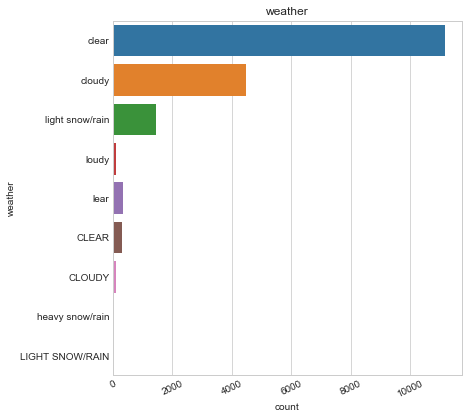

In [250]:
# Plot distribution of all categorical features
num_features = ['weather']
plot_distribution(dataset, num_features, cols=2, rows=2, width=15, height=15, hspace=0.3, wspace=0.4)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that some of the features are in uppercase (e.g. 'cloudy' vs 'CLOUDY') | convert string to lowercase |
| 2 | We can see that some of the features are typed incorrectly (e.g. 'loudy' vs 'cloudy', 'lear' vs 'clear') | amend the string |

**b) Feature cleaning and engineering for categorical features - Countplot**

**Feature:** 'weather'

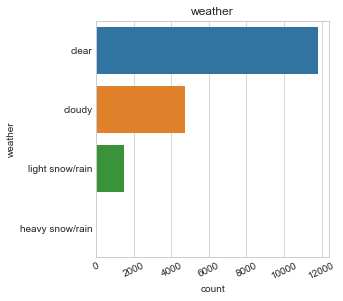

In [252]:
# Convert uppercase strings to lowercase
dataset['weather'] = dataset['weather'].str.lower()

# Replace incorrect strings with correct strings
dataset.loc[dataset['weather'].str.contains('lear'), 'weather'] = 'clear'
dataset.loc[dataset['weather'].str.contains('loudy'), 'weather'] = 'cloudy'

# Re-plot the distribution
num_features = ['weather']
plot_distribution(dataset, num_features, cols=2, rows=2, width=10, height=10, hspace=0.3, wspace=0.4)

**DATE_TIME FEATURES:** 
<br> 'date', 'hr'

**a) Analysis of date_time features - Duplicated Entries**

In [253]:
# Sort the dataset by 'date' and 'hr' to make analysis to be easier
dataset = dataset.sort_values(['date', 'hr'], ascending=[True, True])

In [254]:
# Run duplicate checks on subset=['date','hr'], to identify possible duplicates
dataset.loc[dataset.duplicated(subset=['date','hr'], keep=False)]

,date,hr,weather,temperature,relative-humidity,psi,guest-users,registered-users
83,2011-01-04,15,clear,70.1,52.0,4.0,120,619
17852,2011-01-04,15,clear,70.1,52.0,4.0,120,619
90,2011-01-04,22,clear,65.0,64.0,48.0,9,437
17470,2011-01-04,22,clear,65.0,64.0,48.0,9,437
184,2011-01-08,23,clear,54.9,39.0,10.0,2,284
...,...,...,...,...,...,...,...,...
17499,2012-12-30,2,cloudy,68.4,56.0,23.0,2,247
17337,2012-12-30,6,cloudy,66.7,52.0,23.0,6,92
17662,2012-12-30,6,cloudy,66.7,52.0,23.0,6,92
17357,2012-12-31,2,clear,59.9,59.0,15.0,20,106


| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that there are possible duplicated entries <br> | to remove duplicated data (if reasonable) |

**b) Feature cleaning and engineering for date_time features - Duplicated Entries**

**Feature:** 'date' and 'hr'

In [255]:
# The above formula using subset=['date','hr'], returns 1148 rows.
# However, we are unable to conclude whether the observations is due to actual duplicated entries (i.e. entire row is a duplicate) 
# OR due to data entry error (e.g. keying in wrong 'date','hr')

# Run the same formula, but without subset=['date','hr'] to see if the other columns are duplicates too
dataset.loc[dataset.duplicated(keep=False)]

,date,hr,weather,temperature,relative-humidity,psi,guest-users,registered-users
83,2011-01-04,15,clear,70.1,52.0,4.0,120,619
17852,2011-01-04,15,clear,70.1,52.0,4.0,120,619
90,2011-01-04,22,clear,65.0,64.0,48.0,9,437
17470,2011-01-04,22,clear,65.0,64.0,48.0,9,437
184,2011-01-08,23,clear,54.9,39.0,10.0,2,284
...,...,...,...,...,...,...,...,...
17499,2012-12-30,2,cloudy,68.4,56.0,23.0,2,247
17337,2012-12-30,6,cloudy,66.7,52.0,23.0,6,92
17662,2012-12-30,6,cloudy,66.7,52.0,23.0,6,92
17357,2012-12-31,2,clear,59.9,59.0,15.0,20,106


Assumption: duplicated rows observed above are due to duplicated entries, not other forms of incorrect data entry such as keying in wrong 'date', 'hr'
<br>Action: to remove all duplicates

In [256]:
# Drop the duplicated entries
dataset = dataset.drop_duplicates(keep='first')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 8 columns):
date                 17379 non-null datetime64[ns]
hr                   17379 non-null int64
weather              17379 non-null object
temperature          17379 non-null float64
relative-humidity    17379 non-null float64
psi                  17379 non-null float64
guest-users          17379 non-null int64
registered-users     17379 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.2+ MB


**a) Analysis of date_time features - Missing Entries**

In [257]:
# Extract first date/hr, last date/hr in dataset
first_date, first_hour, last_date, last_hour = firstlast_datehour(dataset=dataset, datecolumn='date', hrcolumn='hr')

In [258]:
# Create pandas DataFrame with columns 'date' and 'hr' from dataset (first date/hr, last date/hr)
full_datehour = full_datehour(first_date, first_hour, last_date, last_hour)
full_datehour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 17543
Data columns (total 2 columns):
date    17544 non-null datetime64[ns]
hr      17544 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 411.2 KB


| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that there are missing entries from the dataset <br> (full_datehour rows = 17544 > dataset rows = 17379) | to find out the missing entries |

**b) Feature cleaning and engineering for date_time features - Missing Entries**
<br> No feature cleaning/engineering is required, instead we will generate list of missing entries for future use.

**Feature:** 'date' and 'hr'

In [259]:
# Return pandas DataFrame of missing entries with columns 'date' and 'hr'
missing_datehour = return_missing_datehour(full_datehour, dataset, datecolumn='date', hrcolumn='hr')
missing_datehour.head()

,date,hr
29,2011-01-02,5
50,2011-01-03,2
51,2011-01-03,3
75,2011-01-04,3
99,2011-01-05,3


**a) Analysis of date_time features - New Features**
<br> From our analysis in part 1, additional features can be created for 'date' and 'hr'. We will proceed to create these features.

**b) Feature cleaning and engineering - New Features**

**Feature:** 'date'

In [260]:
# Create 2 new features, 'month' and 'day' to replace 'date'. 
# These features seperately will be more informative in predicting total number of active users.
dataset = add_features_datetime_YMD (dataset, column='date', feature_name=['month', 'day'])
dataset.head()

,hr,weather,temperature,relative-humidity,psi,guest-users,registered-users,month,day
0,0,clear,66.7,81.0,3.0,21,164,1,6
1,1,clear,65.0,80.0,35.0,54,417,1,6
2,2,clear,65.0,80.0,38.0,35,356,1,6
3,3,clear,66.7,75.0,35.0,19,129,1,6
4,4,clear,66.7,75.0,11.0,2,10,1,6


**Feature:** 'hr'and 'month'

In [261]:
# Create cyclical features for 'hr', 'day', 'month'
dataset = cyclical_features(dataset, columnheaders=['hr', 'day', 'month'])
dataset.head()

,weather,temperature,relative-humidity,psi,guest-users,registered-users,hr_sin,hr_cos,day_sin,day_cos,month_sin,month_cos
0,clear,66.7,81.0,3.0,21,164,0.000000,1.000000,-0.781831,0.62349,0.0,1.0
1,clear,65.0,80.0,35.0,54,417,0.258819,0.965926,-0.781831,0.62349,0.0,1.0
2,clear,65.0,80.0,38.0,35,356,0.500000,0.866025,-0.781831,0.62349,0.0,1.0
3,clear,66.7,75.0,35.0,19,129,0.707107,0.707107,-0.781831,0.62349,0.0,1.0
4,clear,66.7,75.0,11.0,2,10,0.866025,0.500000,-0.781831,0.62349,0.0,1.0


#####  **3) EXPLORE HIDDEN RELATIONSHIPS BETWEEN FEATURES**
For our dataset, we can categorise into 2 main categories for our analysis:
<br> **Independent features** 
<br> **Target features** 

For this section we will:
<br> **a) conduct correlation analysis amongst all features**
<br> **b) plot graphs between Independent features and Target features to identify hidden relationships**
<br> **c) plot graph between Target features to identify hidden relationships**

**a) Correlation analysis - Heatmap**

In [264]:
# Split into independent features X and target features y
target_features = ['guest-users', 'registered-users']
X = dataset.drop(target_features, axis=1)
y = dataset.loc[:, target_features]

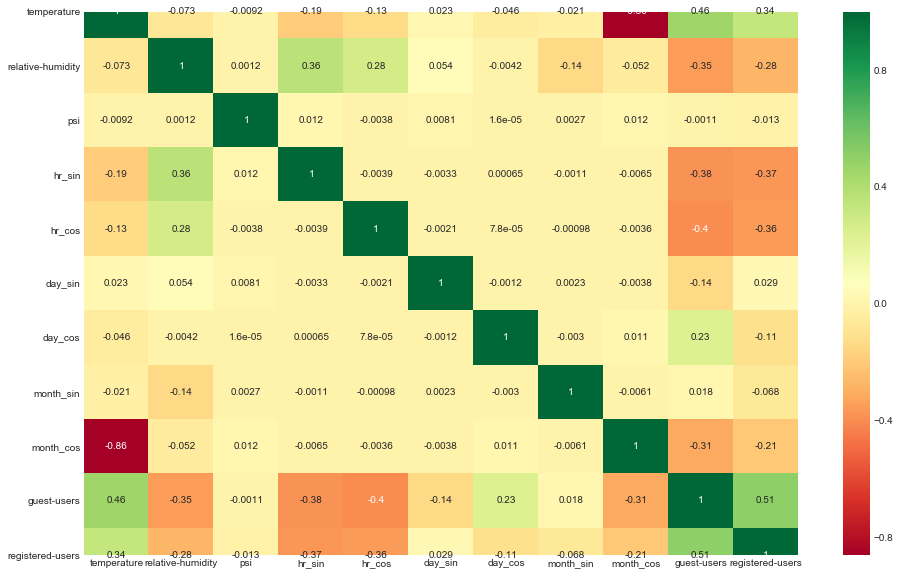

In [265]:
# Conduct correlation analysis for numerical features
all_features = pd.concat([X,y], axis=1)

# Plot heatmap
plt.figure(figsize = (16,10))
sns.heatmap(all_features.corr(), annot=True,cmap ='RdYlGn') 

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | Correlation amongst idependent features does not seem to be high, there should be no multicollinearity issue | - |
| 2 | Correlation between certain independent features and target features seems to be low <br> (e.g. 'psi') | consider dropping the feature |

**b) Identify hidden relationships - Scatterplot (numerical), Boxplot (categorical)**

In [266]:
 #cyclical features are not plot, as sin/cos individually is difficult to interpret
X_columns = ['temperature', 'relative-humidity', 'psi']
y_columns = ['registered-users', 'guest-users']

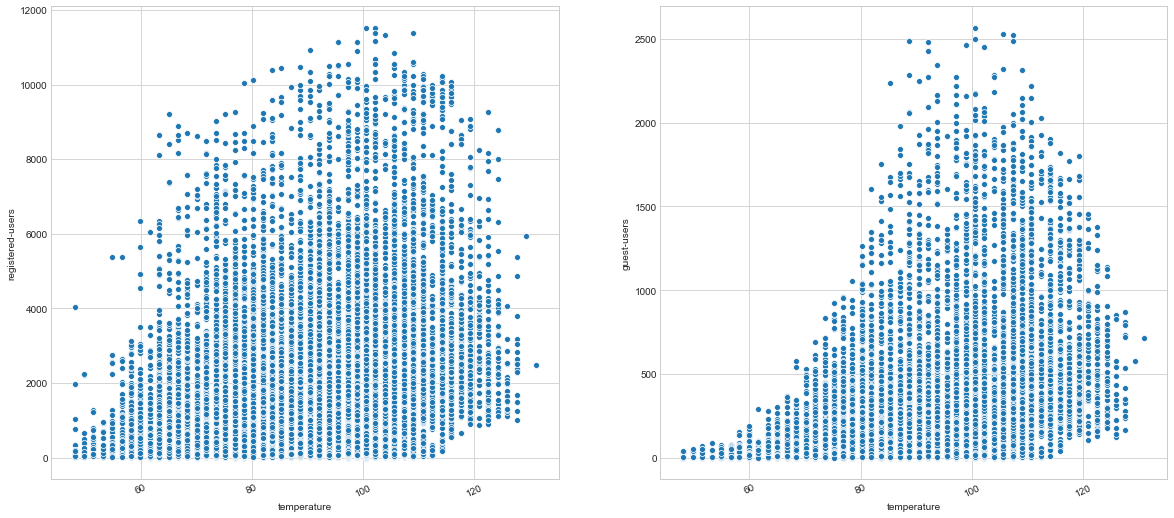

In [272]:
# Plot for 'temperature'
plot_correlation(X, y, X_columns[0:1], y_columns, rows=4, cols=2, width=20 , height=40, hspace=0.2, wspace=0.2)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that both target variables seems to increase as temperature increases till 100F then decreases after that | consider non-linear transformation of 'temperature' |

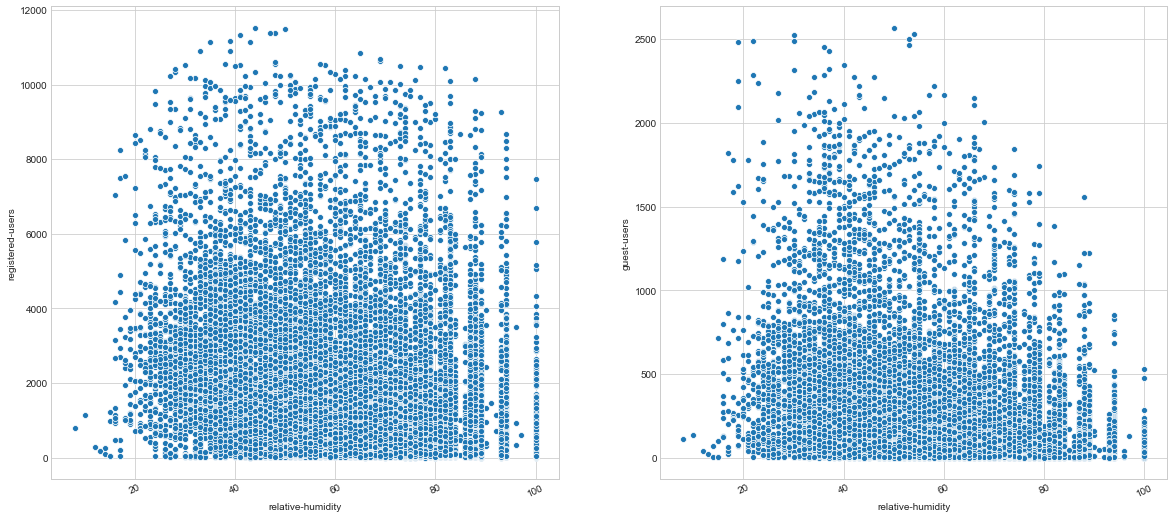

In [277]:
# Plot for 'relative-humidity'
plot_correlation(X, y, X_columns[1:2], y_columns, rows=4, cols=2, width=20 , height=40, hspace=0.2, wspace=0.2)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that both target variables seems to decrease as 'relative-humidity' | - |
| 2 | There seems to have sudden increase in target variables at different bins of 'relative-humidity' <br> (for example, the data when 'relative-humidity' == 100 looks unnatural  | more analysis is required |

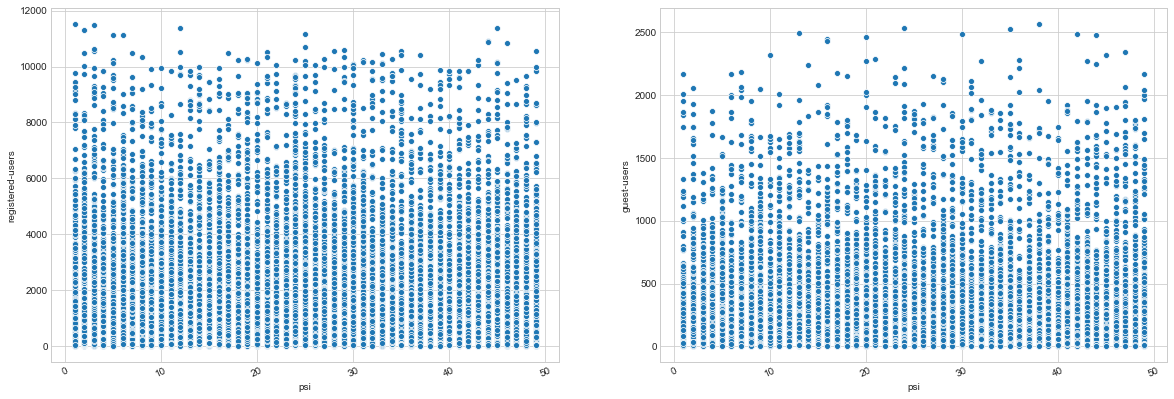

In [280]:
# Plot for 'psi'
plot_correlation(X, y, X_columns[2:3], y_columns, rows=4, cols=2, width=20 , height=30, hspace=0.2, wspace=0.2)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see there is no obvious correlation between target features and 'psi', this is inline with our correlation heatmap | to drop 'psi' |

In [281]:
# Drop the 'psi' feature
dataset = dataset.drop(['psi'], axis = 1)

# Check that feature is dropped correctly
dataset.head()

,weather,temperature,relative-humidity,guest-users,registered-users,hr_sin,hr_cos,day_sin,day_cos,month_sin,month_cos
0,clear,66.7,81.0,21,164,0.000000,1.000000,-0.781831,0.62349,0.0,1.0
1,clear,65.0,80.0,54,417,0.258819,0.965926,-0.781831,0.62349,0.0,1.0
2,clear,65.0,80.0,35,356,0.500000,0.866025,-0.781831,0.62349,0.0,1.0
3,clear,66.7,75.0,19,129,0.707107,0.707107,-0.781831,0.62349,0.0,1.0
4,clear,66.7,75.0,2,10,0.866025,0.500000,-0.781831,0.62349,0.0,1.0


**c) plot graph between Target features to identify hidden relationships**

Text(0, 0.5, 'Active Users')

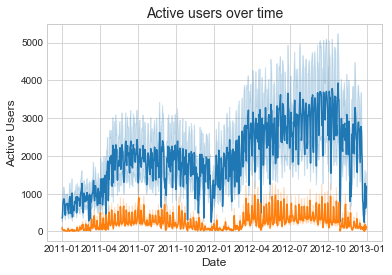

In [314]:
# Plot lineplot if target features over time
ax = sns.lineplot(x='date', y='registered-users', data=dataset)
ax = sns.lineplot(x='date', y='guest-users', data=dataset)
ax.set_title('Active users over time', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Active Users', fontsize=12)

| S/N | Findings | Actions to be taken |
| :-: | :-- | :-: |
| 1 | We can see that both target features correlates with each other, this is inline with our correlation heatmap | consider using one target feature to predict another |

#####  **4) SUMMARY OF ANALYSIS AND IMPLICATIONS**
Based on the analysis done in part 1, 2 and 3 above, please refer to the table below for the summary of our analysis and actions taken and further actions to be taken (if any)
<br> <br> We will be arranging the findings by features:

| Features | Analysis and Actions Taken | Actions to be taken |
| :-: | :-- | :-: |
|| **NUMERICAL FEATURES** ||
| 'temperature' |  no actions taken | nil |
| feels-like-temperature' | this feature was removed as it is highly correlated with 'temperature'. 'temperature' also correlates more with 'guest-users' and 'registered-users' | nil |
| 'relative-humidity' | zero values replaced with median | nil |
| 'windspeed' | this feature was removed as it has many zero values and has a low correlation with target features | nil |
| 'psi' | zero values replaced with median, after which, this feature is removed due to low correlation with target features | nil |
| 'guest-users' | no actions taken | nil |
| 'registered-users' | no actions taken | nil |
|| **CATEGORICAL FEATURES** ||
| 'weather' | convert uppercase strings to lowercase, replace incorrect strings with correct strings | nil |
|| **TIME_DATE FEATURES** ||
| 'date' | these features are removed and replaced with 2 features 'month' and 'day_of_the_week'. We believe that these 2 features is more informative in predicting total number of active users | nil |
| 'hr', 'day' and 'month' | this feature is removed and replaced with cyclical features that are more informative in predicting total number of active users | nil |

| S/N | Analysis and Possible Actions | Actions to be taken |
| :-: | :-- | :-: |
|| **Moving Forward** ||
| 1 | there are no null values, data might have been pre-processed. | to check with data provider |
| 2 | there are missing values (as extracted in pd DataFrame: missing_datehour) | to check with data provider |
| 3 | 'temperature' have non-linear relationship with target variables | to try non-linear transformation |
| 4 | when plotted against 'relative-humidity', 'spikes' in target variables are observed | to do further analysis |
| 5 | 'registered-users' and 'guest-users' correlate with each other | consider using one target feature to predict another |